In [15]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [16]:
df= pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## Veriseti Hakkında 
Veriseti Avustralya'nın 10 yıllık hava durumunu kullanarak oluşturulmuş bir veriseti. Hedefimiz ise RainTomorrow olan sütunu doğru tahmin edebilmek. Bu da yarın yağmur yağıp yağmayacağını tahmin etmek anlamına geliyor.

Location sütunu verinin hangi bölgeye ait olduğu hakkında bilgi veriyor.

Date sütunu kaydın alındığı tarihi belirtiyor.

MinTemp ve MaxTemp ise o gün içerisinde sıcaklığın minimum ve maksimum değerlerini bildiriyor.

Saatlere göre anlık rüzgar, nem ve bulut oranı gibi değişkenler de verisetinde listelenmiş durumda. (WindDir9am, Humidity9am..)

### df.info ile veriyi incelediğimiz zaman birçok sütunda oldukça fazla boş veri olduğunu görmekteyiz. Öncelikle bu verileri doldurmalı ve işlemlerimize boş veri olmadan devam etmeliyiz.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [18]:
df.isnull().sum().sort_values(ascending=False)

Sunshine         69835
Evaporation      62790
Cloud3pm         59358
Cloud9am         55888
Pressure9am      15065
Pressure3pm      15028
WindDir9am       10566
WindGustDir      10326
WindGustSpeed    10263
Humidity3pm       4507
WindDir3pm        4228
Temp3pm           3609
RainTomorrow      3267
Rainfall          3261
RainToday         3261
WindSpeed3pm      3062
Humidity9am       2654
Temp9am           1767
WindSpeed9am      1767
MinTemp           1485
MaxTemp           1261
Location             0
Date                 0
dtype: int64

### Boş veriler

#### Boş verileri doldururlen Evaporation, Cloud3pm ve Cloud9am gibi sütunları, o sütunların medyan değeri ile doldurdum.

In [19]:
df['Evaporation'].unique()

array([     nan, 1.20e+01, 1.48e+01, 1.26e+01, 1.08e+01, 1.14e+01,
       1.12e+01, 1.30e+01, 9.80e+00, 1.46e+01, 1.10e+01, 1.28e+01,
       1.38e+01, 1.64e+01, 1.74e+01, 1.60e+01, 1.36e+01, 8.00e+00,
       8.20e+00, 8.60e+00, 1.42e+01, 1.58e+01, 1.62e+01, 1.34e+01,
       1.44e+01, 1.18e+01, 1.56e+01, 1.52e+01, 1.16e+01, 9.60e+00,
       6.60e+00, 6.00e-01, 6.00e+00, 3.00e+00, 2.00e+00, 5.20e+00,
       9.00e+00, 1.02e+01, 1.00e+01, 7.40e+00, 8.40e+00, 9.20e+00,
       9.40e+00, 1.24e+01, 1.04e+01, 7.20e+00, 6.80e+00, 7.60e+00,
       4.40e+00, 6.40e+00, 7.80e+00, 7.00e+00, 8.80e+00, 6.20e+00,
       5.80e+00, 2.00e-01, 2.40e+00, 1.80e+00, 2.20e+00, 2.80e+00,
       5.00e+00, 5.60e+00, 4.80e+00, 4.20e+00, 4.00e+00, 3.20e+00,
       4.60e+00, 3.40e+00, 3.60e+00, 0.00e+00, 1.40e+00, 3.80e+00,
       8.00e-01, 2.60e+00, 1.60e+00, 1.20e+00, 1.00e+00, 5.40e+00,
       1.06e+01, 1.68e+01, 1.70e+01, 2.02e+01, 1.40e+01, 1.72e+01,
       1.22e+01, 1.50e+01, 1.82e+01, 1.32e+01, 4.10e+00, 1.70e

In [20]:
df['Cloud3pm'].unique(), df['Cloud9am'].unique()

(array([nan,  2.,  8.,  7.,  1.,  5.,  4.,  6.,  3.,  0.,  9.]),
 array([ 8., nan,  7.,  1.,  0.,  5.,  4.,  2.,  6.,  3.,  9.]))

In [21]:
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].median())
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].median())
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].median())

#### Sunshine, Pressure9am ve Pressure3pm gibi verileri ise o sütunun ortalama değerleri ile doldurdum.

In [22]:
df["Sunshine"].unique()

array([ nan, 12.3, 13. , 13.3, 10.6, 12.2,  8.4,  0. , 12.6, 13.2, 12.7,
       12.1, 10.3, 13.1, 12.9, 11.3,  6.9, 10.9,  3.7,  5.9, 10.5, 12.4,
       13.4, 13.6,  7.4, 10. ,  2.3,  6.6,  0.3, 10.7, 11.6, 10.2,  9. ,
       12. ,  3. ,  7.9, 11.5, 11.2,  4.8,  5.8,  6. , 11.1, 11.8, 11.4,
       10.8,  7.8, 11. ,  5.5,  4.7,  4.2,  4.4,  6.2,  9.8,  9.9,  4.3,
        8. ,  9.6, 10.4,  9.3,  8.7,  7.6,  7.5, 10.1,  6.3,  2.8,  0.7,
        9.4,  9.7,  0.6,  5.1,  8.3,  4.1,  3.9,  6.8,  8.6,  2.7,  8.2,
        3.1,  1.8,  0.1,  0.8,  3.4,  7.1,  5. ,  5.7,  6.1,  7. ,  2.9,
        2.5,  4.6,  8.9,  9.1,  1.7,  8.1,  9.5,  1.2,  1.4,  8.8,  2.2,
        3.5,  9.2,  1.9, 11.7, 11.9,  7.7,  0.9, 12.5,  2.1, 12.8, 13.7,
        8.5,  0.2,  4. ,  2.4,  5.2,  0.5,  6.4,  4.5,  1.1,  2. ,  0.4,
        1.5,  3.3,  6.5,  2.6,  3.8,  3.6,  3.2,  6.7,  5.4,  7.2,  4.9,
        1. ,  1.6,  5.3,  7.3,  5.6,  1.3, 13.8, 13.5, 14. , 13.9, 14.1,
       14.5, 14.3, 14.2])

In [23]:
df['Pressure9am'].unique()

array([1007.7, 1010.6, 1007.6, 1017.6, 1010.8, 1009.2, 1009.6, 1013.4,
       1008.9, 1007. , 1011.8, 1010.5,  994.3, 1001.2, 1009.7, 1012.2,
       1005.8, 1009.4, 1019.2, 1019.3, 1013.6, 1007.8, 1011. , 1012.9,
       1010.9, 1006.8, 1005.2, 1004.8, 1005.6, 1006.1, 1004.5, 1014.4,
       1018.7, 1015.1, 1012.6, 1011.9, 1017.8, 1009.9, 1014.1, 1015.7,
       1011.6, 1008.4, 1019.7, 1015.8, 1010.1, 1005.3, 1007.9, 1005.4,
       1016.5, 1017.7, 1014.9, 1014.6, 1014.2, 1012.5, 1011.7, 1008.8,
       1005.9, 1008. , 1008.2, 1009.3, 1012.8, 1017. , 1023.3, 1022.5,
       1016.2, 1017.2, 1012.4, 1015.6, 1013. , 1014. , 1016.6, 1007.5,
       1014.7, 1014.5, 1013.7, 1015.2, 1019.5, 1021.3, 1017.4, 1012.7,
       1013.3, 1016.3, 1014.8, 1019.1, 1023. , 1023.8, 1022.4, 1023.2,
       1022.6, 1018.8, 1019.8, 1020.4, 1021.8, 1026.7, 1027.1, 1024.2,
       1021.5, 1024.4, 1024.1, 1018.5, 1022.8, 1022.7, 1023.6, 1025.2,
       1026. , 1004. , 1013.8, 1018. , 1023.1, 1023.4, 1026.9, 1028.7,
      

In [24]:
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())

In [25]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

### Date sütununu gün, ay ve yıl olarak ayırıp Date sütununu kaldırıyorum çünkü artık işime yaramayacak.

In [26]:
df['Date']= pd.to_datetime(df['Date'])
df['Year']= df['Date'].apply(lambda x:x.year)
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)
df.drop('Date', axis=1, inplace=True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,4.8,7.611178,W,44.0,W,WNW,...,1007.1,8.0,5.0,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,4.8,7.611178,WNW,44.0,NNW,WSW,...,1007.8,5.0,5.0,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,4.8,7.611178,WSW,46.0,W,WSW,...,1008.7,5.0,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,4.8,7.611178,NE,24.0,SE,E,...,1012.8,5.0,5.0,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,4.8,7.611178,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


### Kalan eksik verileri tamamlamaya ihtiyaç duymuyorum. Yaklaşık 150 bin verilik bir sistemden birkaç bin verinin eksilmesi öğrenmemi kötü etkilemeyecek.

In [27]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121790 entries, 0 to 145458
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       121790 non-null  object 
 1   MinTemp        121790 non-null  float64
 2   MaxTemp        121790 non-null  float64
 3   Rainfall       121790 non-null  float64
 4   Evaporation    121790 non-null  float64
 5   Sunshine       121790 non-null  float64
 6   WindGustDir    121790 non-null  object 
 7   WindGustSpeed  121790 non-null  float64
 8   WindDir9am     121790 non-null  object 
 9   WindDir3pm     121790 non-null  object 
 10  WindSpeed9am   121790 non-null  float64
 11  WindSpeed3pm   121790 non-null  float64
 12  Humidity9am    121790 non-null  float64
 13  Humidity3pm    121790 non-null  float64
 14  Pressure9am    121790 non-null  float64
 15  Pressure3pm    121790 non-null  float64
 16  Cloud9am       121790 non-null  float64
 17  Cloud3pm       121790 non-nul

## Kategorik veriler için görselleştirme

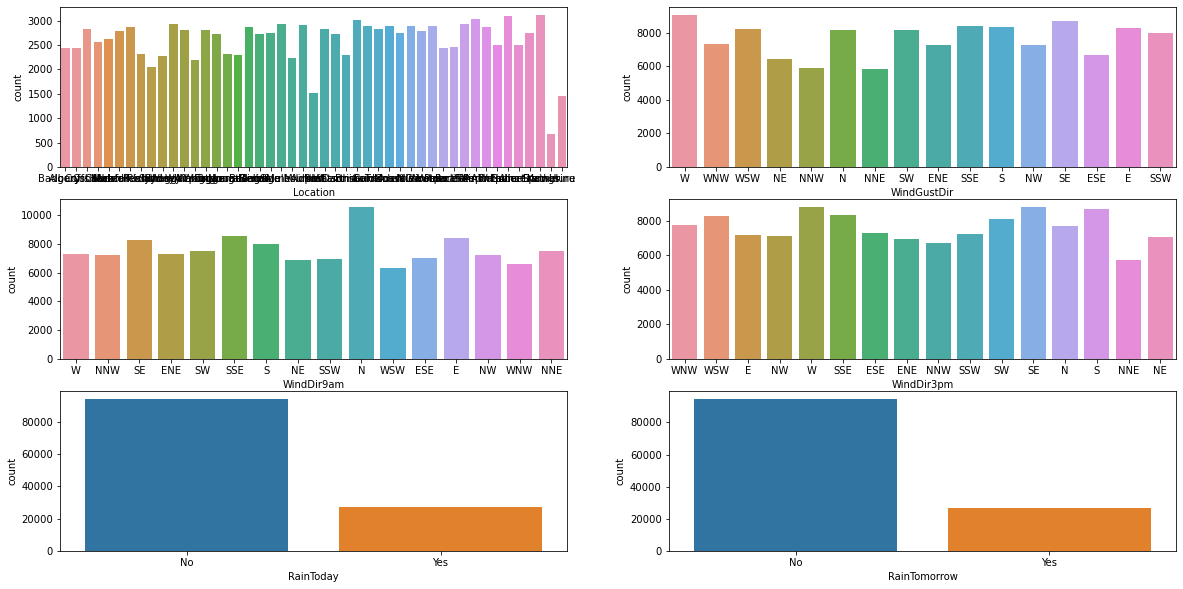

In [28]:
i=1
plt.figure(figsize=(20,10))
for col in df.columns:
    if df[col].dtype=='object':
        plt.subplot(3,2,i)
        sns.countplot(df[col])
        i+=1

## Encoding - kategorik veriler

In [29]:
cat_cols= [col for col in df.columns if df[col].dtype=='object']
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

for col in cat_cols:
    df[col]= le.fit_transform(df[col])

df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,1,13.4,22.9,0.6,4.8,7.611178,13,44.0,13,14,...,1007.1,8.0,5.0,16.9,21.8,0,0,2008,12,1
1,1,7.4,25.1,0.0,4.8,7.611178,14,44.0,6,15,...,1007.8,5.0,5.0,17.2,24.3,0,0,2008,12,2
2,1,12.9,25.7,0.0,4.8,7.611178,15,46.0,13,15,...,1008.7,5.0,2.0,21.0,23.2,0,0,2008,12,3
3,1,9.2,28.0,0.0,4.8,7.611178,4,24.0,9,0,...,1012.8,5.0,5.0,18.1,26.5,0,0,2008,12,4
4,1,17.5,32.3,1.0,4.8,7.611178,13,41.0,1,7,...,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,5


### Bir heat-map yardımıyla sütunların birbirleriyle olan korelasyonlarını inceliyorum. 

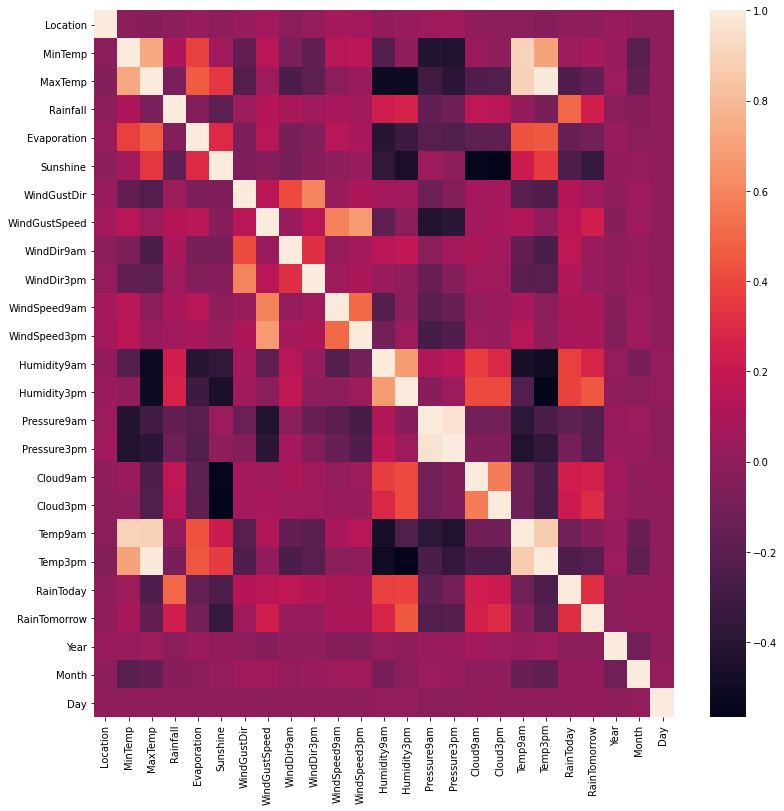

In [30]:
plt.figure(figsize=(13,13))
sns.heatmap(df.corr(), annot=False);

In [31]:
np.abs(df.corr()['RainTomorrow']).sort_values(ascending=False)

RainTomorrow     1.000000
Humidity3pm      0.455048
Sunshine         0.339951
RainToday        0.313567
Cloud3pm         0.299234
Humidity9am      0.273326
Cloud9am         0.253228
Rainfall         0.238865
WindGustSpeed    0.235302
Pressure9am      0.235078
Pressure3pm      0.216014
Temp3pm          0.199926
MaxTemp          0.166291
WindSpeed3pm     0.096451
Evaporation      0.095335
WindSpeed9am     0.093249
MinTemp          0.078922
WindGustDir      0.048138
Temp9am          0.035488
WindDir9am       0.029345
WindDir3pm       0.023796
Year             0.012865
Month            0.006556
Day              0.005577
Location         0.002960
Name: RainTomorrow, dtype: float64

### Görüldüğü gibi RainTomorrow değeri 0 olanların sayısı 1 olanlara aşırı bir üstünlük sağlamış durumda. Bu durum öğrenme işlemini kötü etkileyeceğinden dolayı veri örneklendirme yapacağım.

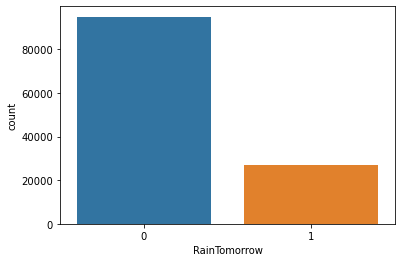

In [32]:
sns.countplot(df['RainTomorrow']);

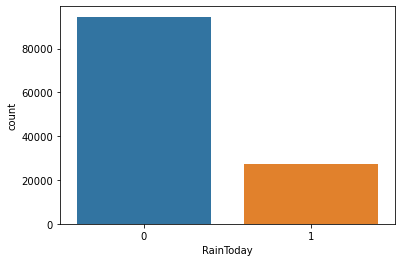

In [33]:
sns.countplot(df['RainToday']);

### Veriyi örneklendirme

In [34]:
from sklearn.utils import resample, shuffle
zero = df[df['RainTomorrow']==0]
one= df[df['RainTomorrow']==1]

upsampled= resample(one, replace=True, n_samples= zero.shape[0])

df= pd.concat([zero, upsampled])
df= shuffle(df)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
73022,19,5.7,16.9,0.0,1.2,6.300000,12,35.0,14,11,...,1029.4,1.0,5.0,9.0,16.3,0,0,2016,6,11
45393,45,22.0,34.6,0.0,4.8,7.611178,7,76.0,7,14,...,1007.8,5.0,8.0,32.9,31.7,0,1,2016,12,14
97771,0,8.5,17.1,0.8,4.8,7.611178,12,22.0,10,12,...,1033.7,5.0,5.0,10.3,15.9,0,0,2012,7,21
8586,9,25.8,38.4,0.0,10.6,7.611178,13,50.0,5,3,...,1012.5,7.0,6.0,28.9,38.3,0,1,2016,3,11
93432,37,18.8,29.5,0.0,8.0,7.800000,1,41.0,9,1,...,1014.6,5.0,7.0,25.7,27.1,0,0,2009,5,2


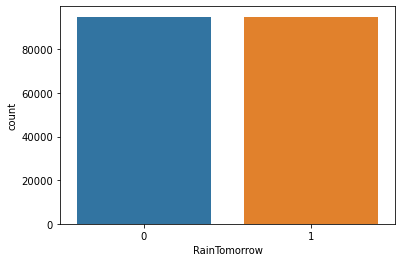

In [35]:
sns.countplot(df['RainTomorrow']);

In [36]:
zero = df[df['RainToday']==0]
one= df[df['RainToday']==1]

upsampled= resample(one, replace=True, n_samples= zero.shape[0])

df= pd.concat([zero, upsampled])
df= shuffle(df)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
24423,28,13.2,30.9,0.2,4.8,7.611178,7,76.0,7,6,...,1015.255889,5.0,5.0,22.1,30.3,0,1,2009,9,22
141636,12,21.9,33.9,0.0,4.6,11.100000,0,37.0,0,3,...,1012.100000,1.0,1.0,26.6,31.5,0,0,2015,8,28
28263,32,16.0,18.8,8.0,3.9,7.611178,10,30.0,11,10,...,1014.100000,5.0,5.0,16.2,17.8,1,1,2012,2,1
19094,24,14.0,20.5,2.2,4.8,7.611178,10,20.0,15,0,...,1010.500000,5.0,5.0,15.5,18.8,1,1,2011,10,7
140173,12,17.0,29.5,0.0,4.6,11.000000,0,39.0,1,6,...,1010.100000,1.0,1.0,23.0,28.4,0,0,2011,6,28


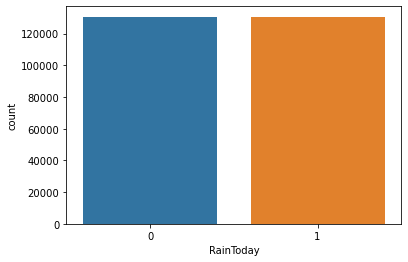

In [37]:
sns.countplot(df['RainToday']);

In [38]:
X= df.drop('RainTomorrow', axis=1)
y= df['RainTomorrow']

### Öğrenme için en iyi sütunların seçilmesi

In [41]:
from sklearn.feature_selection import SelectKBest, f_classif

skb= SelectKBest(score_func= f_classif, k=15)
X_new= skb.fit_transform(X, y)

X_new.shape

(261224, 15)

### train_test_split ile test ve train verilerinin oluşturulması

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

ss=StandardScaler()

X_train, X_test, y_train, y_test= train_test_split(X_new,y,test_size=0.2, stratify=y)
X_train= ss.fit_transform(X_train)
X_test= ss.transform(X_test)

### Modelimizi oluşturma 

In [88]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping

#### Derin öğrenme modelimizi oluşturuyoruz. Classification çalışması olduğu için relu ve sigmoid kullanıyorum.

In [91]:
model= Sequential()

model.add(Dense(512, activation='relu', input_dim= X_new.shape[1]))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [92]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [98]:
history = model.fit(X_train, np.array(y_train), validation_split=0.1,batch_size=100, epochs=100, verbose=1)

Epoch 1/100
1880/1880 [==============================] - 3s 2ms/step - loss: 0.4216 - accuracy: 0.8042 - val_loss: 0.4159 - val_accuracy: 0.8067
Epoch 2/100
1880/1880 [==============================] - 3s 1ms/step - loss: 0.4047 - accuracy: 0.8132 - val_loss: 0.4034 - val_accuracy: 0.8114
Epoch 3/100
1880/1880 [==============================] - 3s 1ms/step - loss: 0.3908 - accuracy: 0.8215 - val_loss: 0.3917 - val_accuracy: 0.8202
Epoch 4/100
1880/1880 [==============================] - 3s 1ms/step - loss: 0.3737 - accuracy: 0.8321 - val_loss: 0.3743 - val_accuracy: 0.8305
Epoch 5/100
1880/1880 [==============================] - 3s 1ms/step - loss: 0.3538 - accuracy: 0.8427 - val_loss: 0.3573 - val_accuracy: 0.8402
Epoch 6/100
1880/1880 [==============================] - 3s 1ms/step - loss: 0.3325 - accuracy: 0.8538 - val_loss: 0.3378 - val_accuracy: 0.8486
Epoch 7/100
1880/1880 [==============================] - 3s 2ms/step - loss: 0.3115 - accuracy: 0.8645 - val_loss: 0.3255 - val_ac

In [99]:
model.evaluate(X_train, y_train)
model.evaluate(X_test,y_test)

1632/1632 [==============================] - 1s 561us/step - loss: 0.4281 - accuracy: 0.9463


[0.4280908405780792, 0.9463444352149963]

In [100]:
predictions= model.predict(X_test)

In [101]:
predictions[:10]

array([[9.9999988e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.8335804e-06],
       [1.1271703e-20],
       [9.9999905e-01],
       [4.0265918e-04],
       [8.6979985e-01],
       [1.0000000e+00],
       [1.3763919e-06]], dtype=float32)

In [102]:
predict=[]
for i in predictions:
    if i<0.5:
        predict.append(0)
    else:
        predict.append(1)
predict[:10]

[1, 1, 1, 0, 0, 1, 0, 1, 1, 0]

In [103]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94     22511
           1       0.93      0.98      0.95     29711

    accuracy                           0.95     52222
   macro avg       0.95      0.94      0.94     52222
weighted avg       0.95      0.95      0.95     52222



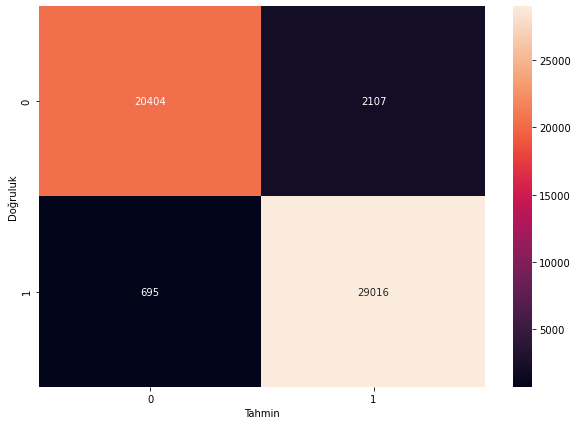

In [104]:
import tensorflow as tf
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=predict)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Tahmin')
plt.ylabel('Doğruluk');

In [105]:
acc = round((20404+29019) / (20404 + 29019 + 695 + 2107), 2)

In [107]:
print("Başarı Oranı:", acc)

Başarı Oranı: 0.95
